# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [4]:
df = pd.read_csv('hotel_booking.csv')

# EDA & Data cleaning

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [10]:
df.shape

(119390, 36)

In [12]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df[''])

In [21]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


In [23]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

['669-792-1661' '858-637-6955' '652-885-2745' ... '395-518-4100'
 '531-528-1017' '422-804-6403']
--------------------------------------------------
credit_card
['************4322' '************9157' '************3734' ...
 '************9170' '************6349' '************7959']
--------------------------------------------------


In [33]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [35]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [41]:
columns = df.select_dtypes(include=['number']).columns
columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [42]:
for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows where the column value is outside the IQR bounds
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [44]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,53823.000000,53823.000000,53823.000000,53823.000000,53823.000000,53823.000000,53823.000000,53823.0,53823.0,53823.0,53823.0,53823.0,53823.0,53823.0,53823.0,53823.000000,53823.0,53823.000000
mean,0.397005,98.039463,2016.197239,26.530517,15.679319,0.924456,2.404493,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.768363,0.0,0.535385
std,0.489282,87.853713,0.694769,13.434672,8.873480,0.875821,1.410404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.457558,0.0,0.684236
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.500000,0.0,0.000000
25%,0.000000,26.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.800000,0.0,0.000000
50%,0.000000,73.000000,2016.000000,26.000000,16.000000,1.000000,2.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.500000,0.0,0.000000
75%,1.000000,151.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.120000,0.0,1.000000
max,1.000000,373.000000,2017.000000,53.000000,31.000000,4.000000,6.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189.200000,0.0,2.000000


# Data Analysis and Visualizations

is_canceled
0    0.602995
1    0.397005
Name: proportion, dtype: float64


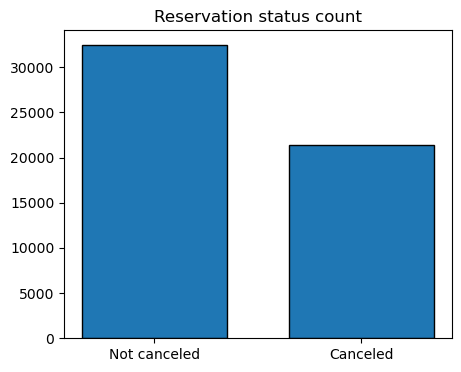

In [48]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled', 'Canceled'], df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)
plt.show()

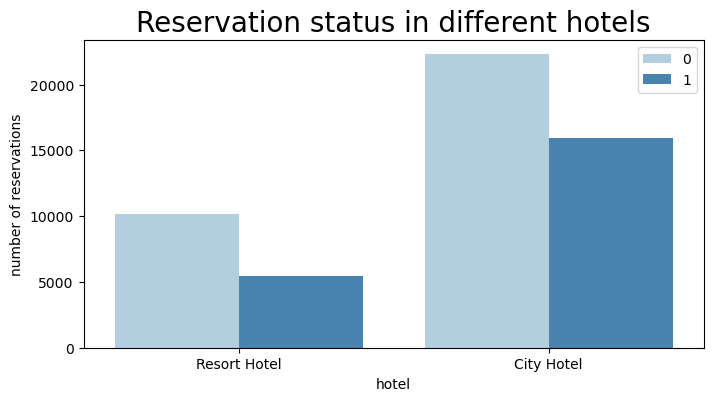

In [55]:
plt.figure(figsize=(8, 4))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))  # Corrected here
plt.title('Reservation status in different hotels', size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.show()


In [56]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.652417
1    0.347583
Name: proportion, dtype: float64

In [66]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582863
1    0.417137
Name: proportion, dtype: float64

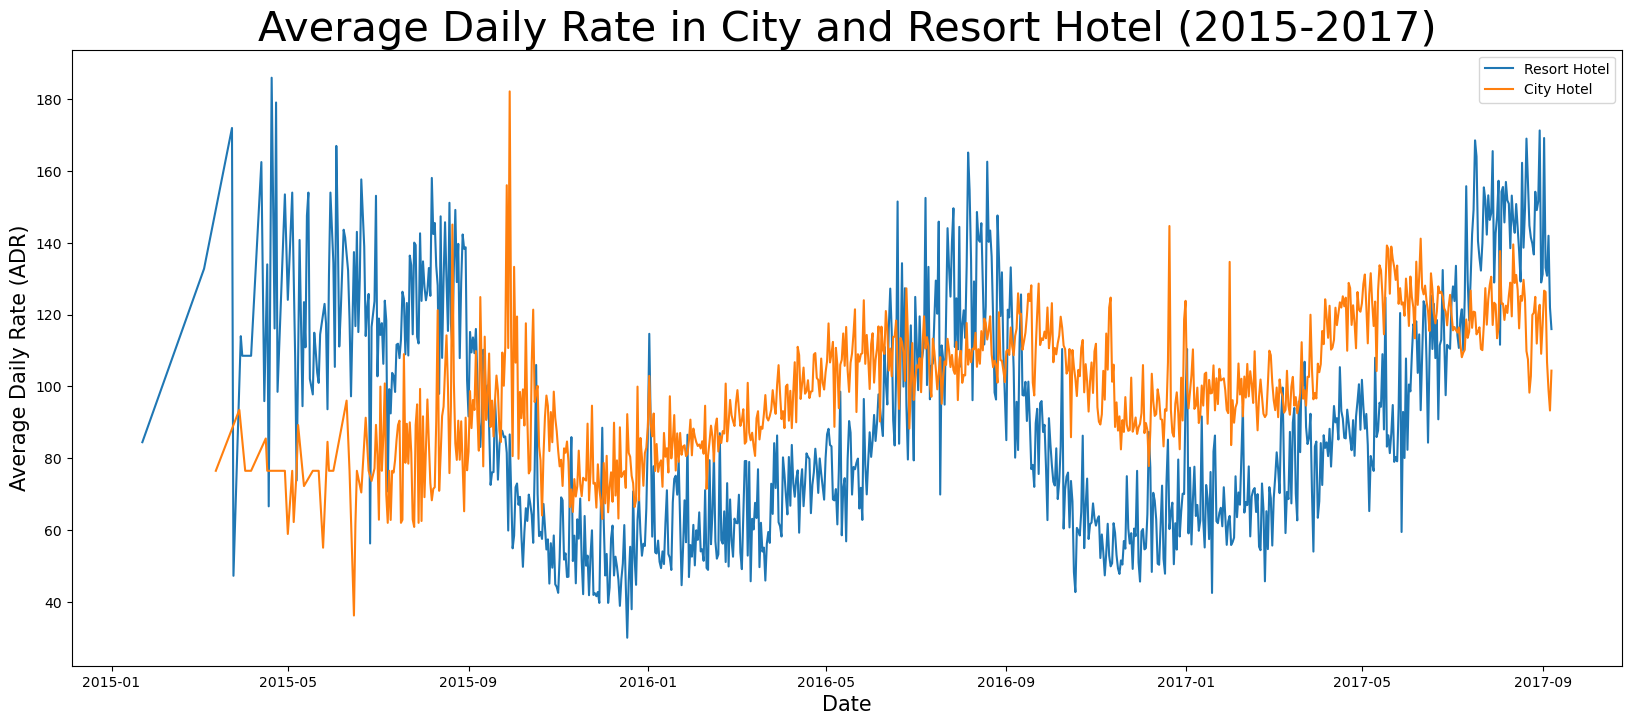

In [67]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

filtered_df = df[(df['reservation_status_date'].dt.year >= 2015) & (df['reservation_status_date'].dt.year <= 2017)]

resort_hotel = filtered_df[filtered_df['hotel'] == 'Resort Hotel']
city_hotel = filtered_df[filtered_df['hotel'] == 'City Hotel']

# Group by 'reservation_status_date' and calculate average daily rate (adr)
resort_hotel_adr = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel_adr = city_hotel.groupby('reservation_status_date')[['adr']].mean()

# Plotting the average daily rate
plt.figure(figsize=(20, 8))
plt.title('Average Daily Rate in City and Resort Hotel (2015-2017)', fontsize=30)
plt.plot(resort_hotel_adr.index, resort_hotel_adr['adr'], label='Resort Hotel')
plt.plot(city_hotel_adr.index, city_hotel_adr['adr'], label='City Hotel')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Average Daily Rate (ADR)', fontsize=15)
plt.legend()
plt.show()

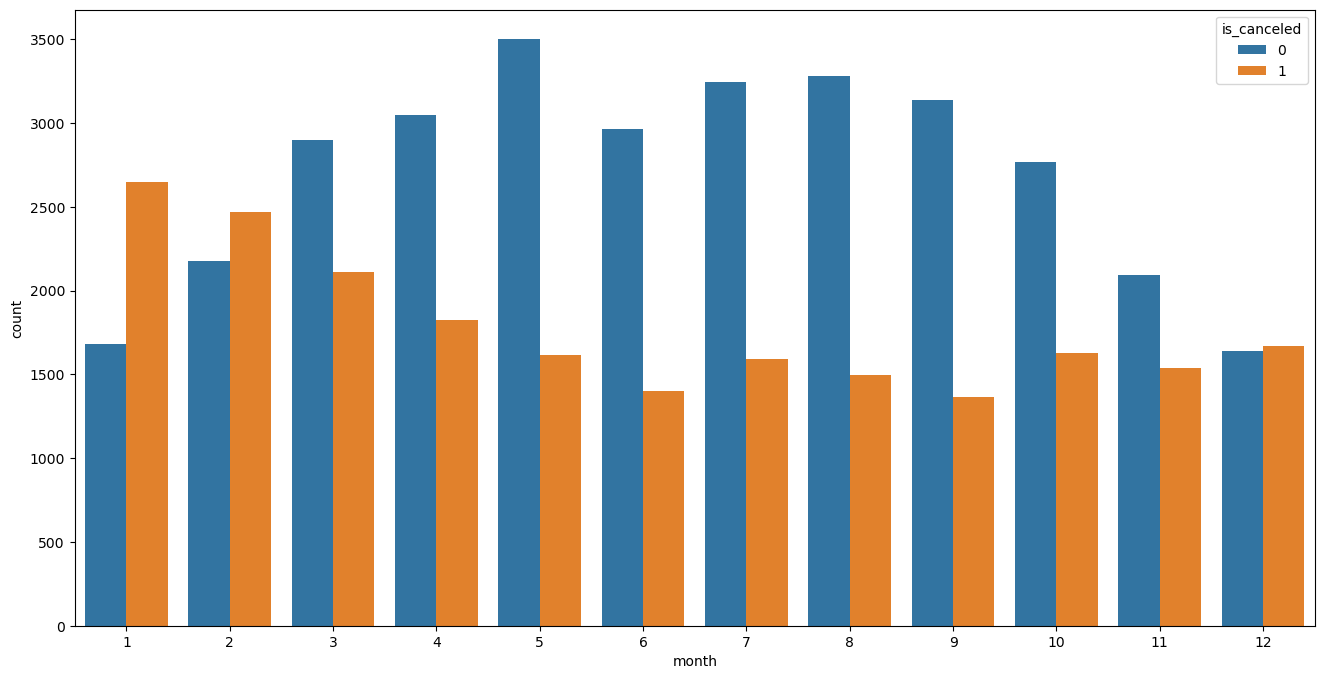

In [70]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data=df)

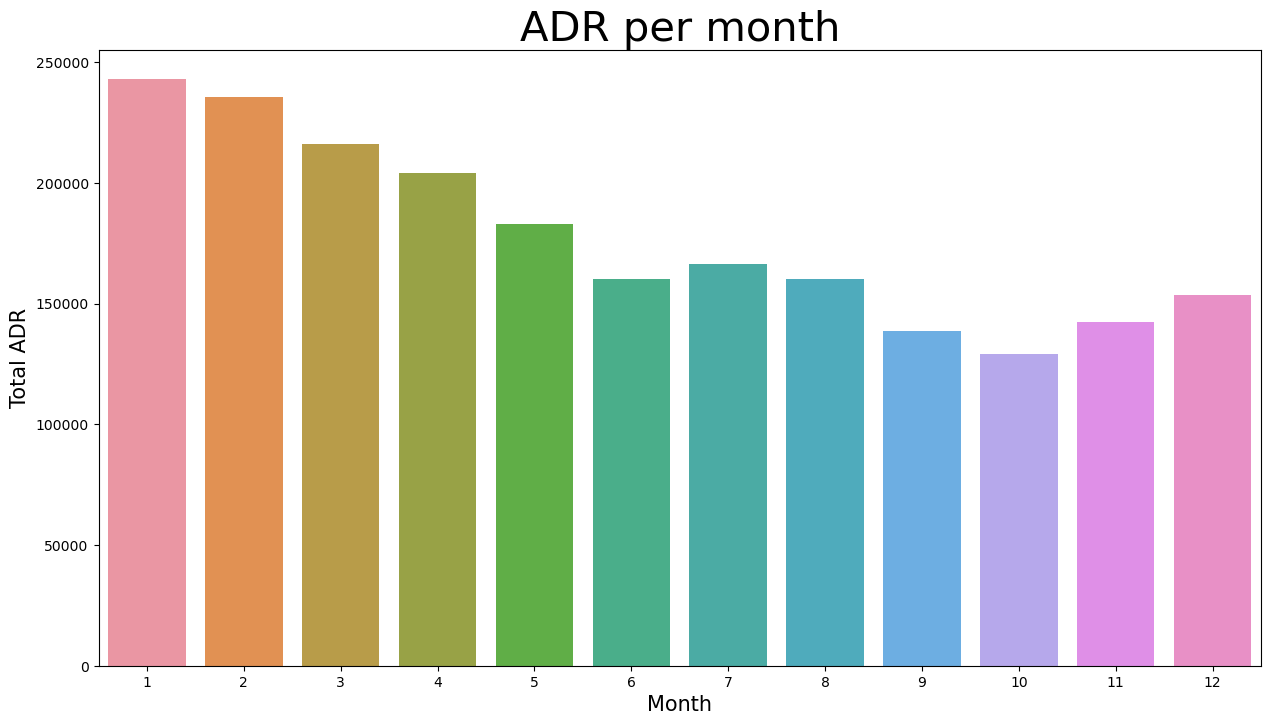

In [73]:
plt.figure(figsize=(15, 8))
plt.title('ADR per month', fontsize=30)

sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())

plt.xlabel('Month', fontsize=15)
plt.ylabel('Total ADR', fontsize=15)
plt.show()

([<matplotlib.patches.Wedge at 0x2b6f4fdded0>,
 [Text(-0.46684252207954763, 0.9960211140223922, 'PRT'),
  Text(-0.4843803393367439, -0.9876111010230804, 'GBR'),
  Text(-0.027796360605802012, -1.099648744980447, 'FRA'),
  Text(0.38206918320675864, -1.031514972864534, 'ESP'),
  Text(0.6958139029450844, -0.8519642084432473, 'ITA'),
  Text(0.9012748325344602, -0.6306375157251438, 'DEU'),
  Text(1.0130879459208169, -0.428547329743099, 'IRL'),
  Text(1.0660611821390187, -0.27113383399413293, 'BRA'),
  Text(1.0907730810149499, -0.14217624883627386, 'BEL'),
  Text(1.099035937160392, -0.046043553620231825, 'CHN')],
 [Text(-0.25464137567975326, 0.5432842440122139, '63.95'),
  Text(-0.26420745782004207, -0.5386969641944074, '7.58'),
  Text(-0.015161651239528368, -0.5998084063529711, '6.13'),
  Text(0.20840137265823197, -0.5626445306533822, '5.97'),
  Text(0.37953485615186416, -0.464707750059953, '4.54'),
  Text(0.49160445410970544, -0.34398409948644204, '4.23'),
  Text(0.5525934250477181, -0.2337

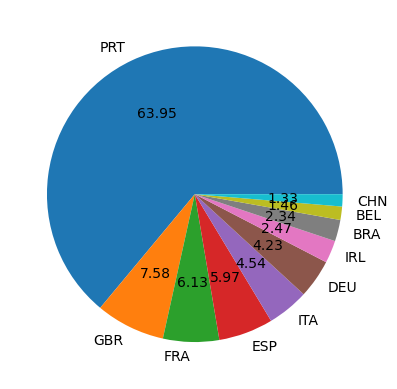

In [80]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)

In [83]:
df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.535570
Offline TA/TO    0.218680
Groups           0.156643
Direct           0.077662
Corporate        0.011222
Complementary    0.000204
Aviation         0.000019
Name: proportion, dtype: float64

In [85]:
cancelled_data['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.535708
Groups           0.253136
Offline TA/TO    0.166089
Direct           0.036456
Corporate        0.008564
Complementary    0.000047
Name: proportion, dtype: float64

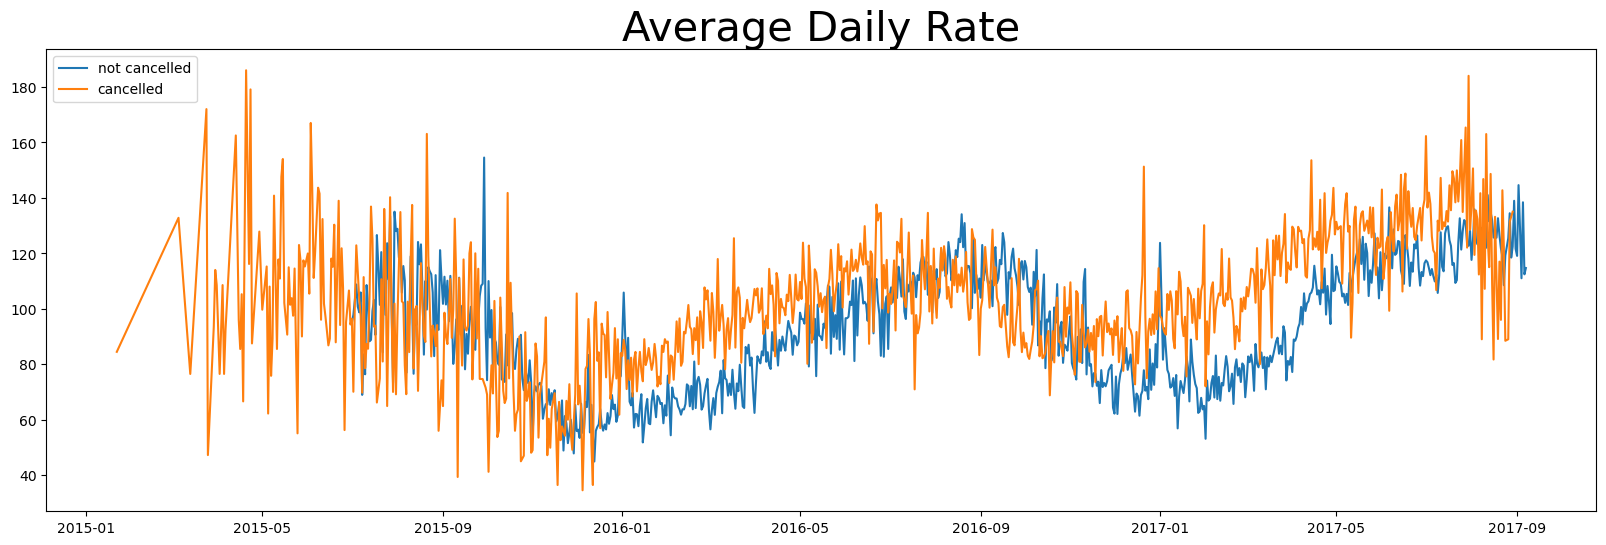

In [91]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize=(20, 6))
plt.title('Average Daily Rate', fontsize=30)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()